# Heavy traffic indicators on I-94
 Using the dataset of I-94 Interstate highway we are going to look at the factors that causes slowness in traffic in this notebook . Data is <a href="https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume">here</a>

## Loading the dataset

In [18]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


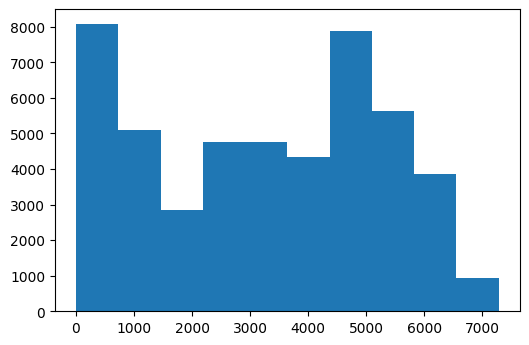

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
traffic['traffic_volume'].hist()
plt.grid(False)
print(traffic['traffic_volume'].describe())

In [20]:

traffic['dt_time']=pd.to_datetime(traffic['date_time'])

In [21]:
traffic['dt_hr']= traffic['dt_time'].dt.hour

# Traffic : Split to day and night

In [22]:
traffic['day_or_night'] = 'night'
traffic.loc[(traffic.dt_hr>=7) & (traffic.dt_hr<=19),'day_or_night'] = 'day'


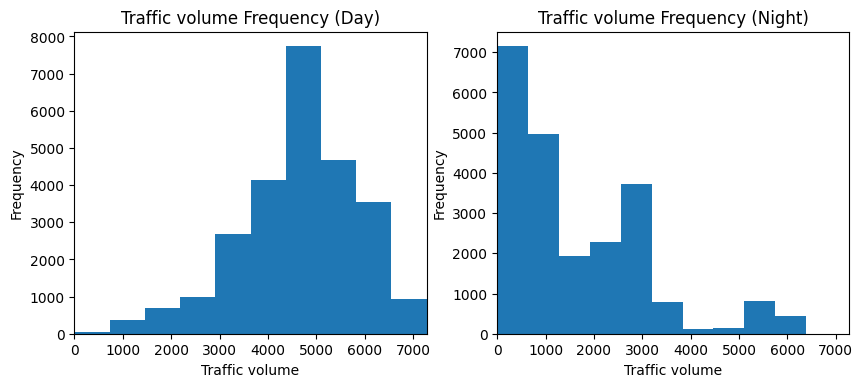

In [23]:
import matplotlib.pyplot as plt
xlim1 = traffic.loc[:,'traffic_volume'].min()
xlim2 = traffic.loc[:,'traffic_volume'].max()
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
traffic.loc[(traffic.day_or_night=='day')].traffic_volume.plot.hist()
plt.xlim(xlim1,xlim2)
plt.title('Traffic volume Frequency (Day)')
plt.xlabel('Traffic volume')
plt.subplot(1,2,2)
traffic.loc[(traffic.day_or_night=='night')].traffic_volume.plot.hist()
plt.title('Traffic volume Frequency (Night)')
plt.xlabel('Traffic volume')
plt.xlim(xlim1,xlim2)

plt.show()


1. It can be observed that the traffic volume between 4000 to 6000 has maximum frequency during the day and during the night the traffic volume has maximum frequency less than 1000
2. The traffic volume frequency is partially symmetric during the day and right skewed during night

# Traffic by month

In [24]:

day = traffic[traffic.day_or_night=='day'].copy()
day['month'] = pd.to_datetime(day.date_time).dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

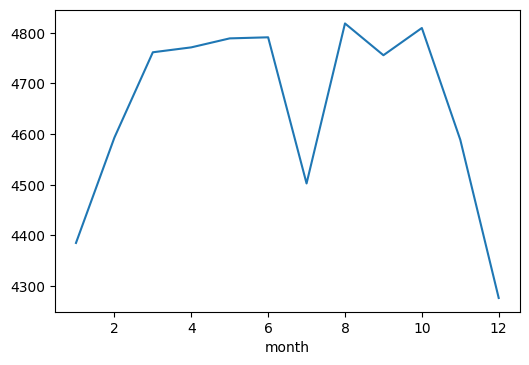

In [25]:
import matplotlib.pyplot as plt
by_month['traffic_volume'].plot.line()

1. The volume is consistently high between March and October excpet during the month of July.


In [26]:

day = traffic[traffic.day_or_night=='day'].copy()

day['dayofweek'] = pd.to_datetime(day['date_time']).dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

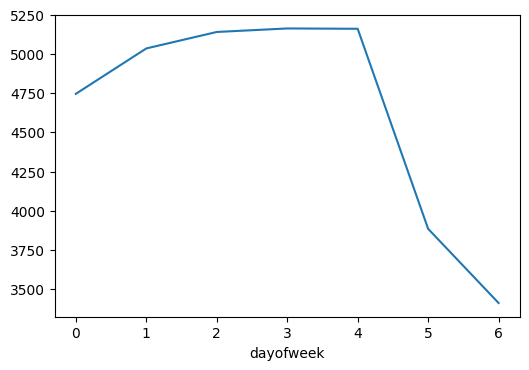

In [27]:
import matplotlib.pyplot as plt
by_dayofweek['traffic_volume'].plot.line()

1. Volume drops on Sat and Sunday

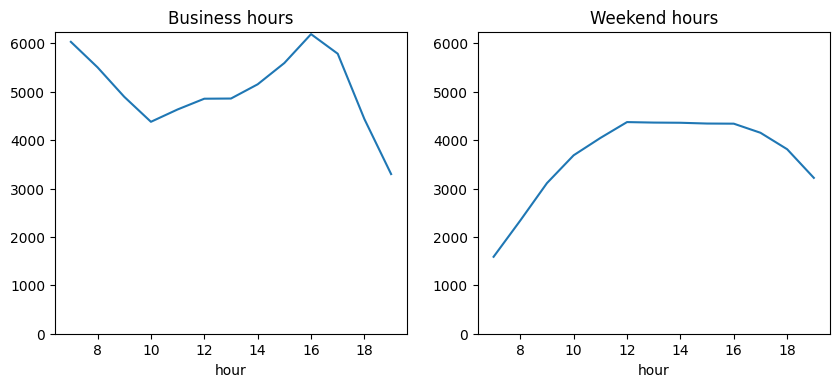

In [28]:
day['hour'] = pd.to_datetime(day['date_time']).dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

# print(by_hour_business['traffic_volume'])
# print(by_hour_weekend['traffic_volume'])
import matplotlib.pyplot as plt
ylim1 = 0
ylim2 = max(by_hour_weekend['traffic_volume'].max(),by_hour_business['traffic_volume'].max())+50
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business hours')
plt.ylim(ylim1,ylim2)
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend hours')
plt.ylim(ylim1,ylim2)
plt.show()

1. Max peak traffic volume is at 7 am and 4 pm for business days and it drops after 4 pm 
2. Weekend traffic volume is peak from 12 pm to 4 pm 
3. Overall traffic volume is higher during business days than weekends

In [29]:
traffic.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'dt_time',
       'dt_hr', 'day_or_night'],
      dtype='object')

In [30]:
print('Correlation')
print('Temperature : ',round(traffic['traffic_volume'].corr(traffic['temp']),2))
print('Rain 1h : ',round(traffic['traffic_volume'].corr(traffic['rain_1h']),2))
print('Temperature : ',round(traffic['traffic_volume'].corr(traffic['snow_1h']),2))
print('Temperature : ',round(traffic['traffic_volume'].corr(traffic['clouds_all']),2))

Correlation
Temperature :  0.13
Rain 1h :  0.0
Temperature :  0.0
Temperature :  0.07


In [31]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

In [32]:
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,dt_hr,dayofweek,hour
weather_main,,,,,,,,
Clear,283.884100,0.000000,0.000000,1.676447,4661.666879,12.958539,3.143518,12.958539
Clouds,282.971967,0.000000,0.000000,62.700890,4746.375927,13.386734,2.999894,13.386734
Drizzle,284.432372,0.168234,0.000000,84.781609,4712.699060,12.825496,2.921630,12.825496
Fog,277.378271,0.157739,0.001356,66.281915,4298.933511,10.648936,2.827128,10.648936
Haze,275.726381,0.060947,0.000000,63.916667,4545.434932,12.780822,2.748858,12.780822
Mist,279.342164,0.249371,0.000778,75.518370,4530.901782,11.527828,2.903601,11.527828
Rain,287.172515,3.690371,0.000268,75.771069,4686.953503,13.167904,2.905392,13.167904
Smoke,292.530000,0.810769,0.000000,49.307692,4447.307692,13.615385,2.230769,13.615385
Snow,268.052688,0.013233,0.001648,80.945478,4295.594612,12.614496,2.756895,12.614496


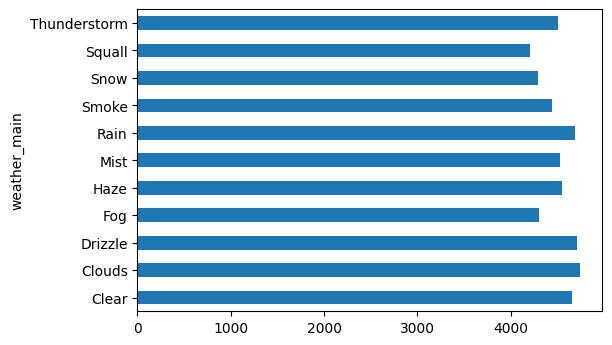

In [33]:
by_weather_main['traffic_volume'].plot.barh()

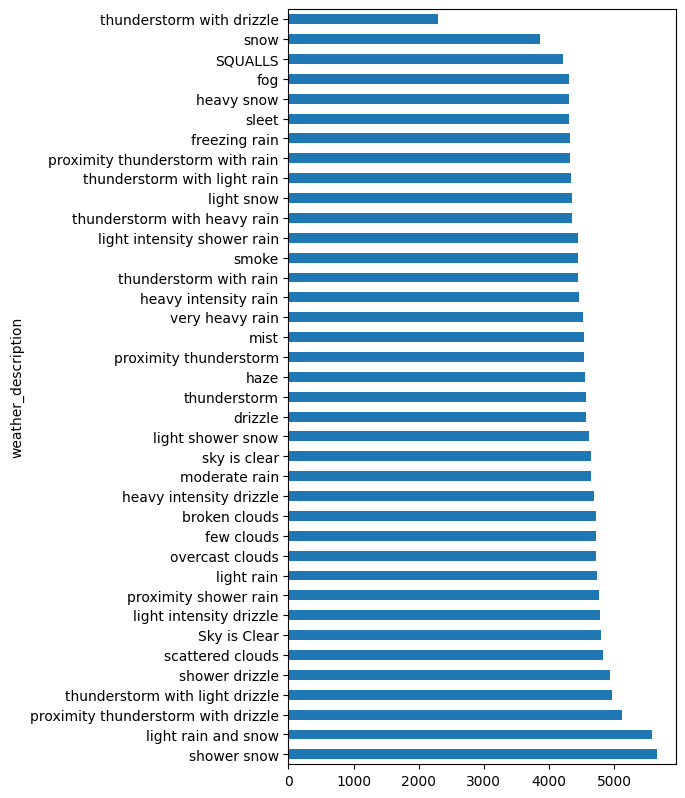

In [34]:
by_weather_description['traffic_volume'].sort_values(ascending=False).plot.barh(figsize=(5,10))

1. Traffic exceeds 5000 for proximity thunderstorm with drizzle,shower snow and light rain & snow 